# I Импортируем библиотеки

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns #для ящика с усами
import tensorflow as tf

from sklearn.preprocessing import Normalizer #импортируем метод для процедуры нормализации 
from sklearn.preprocessing import MinMaxScaler #импортируем метод для процедуры нормализации
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression # из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from tensorflow.keras import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Dropout  # Подключаем класс Dense - полносвязный слой
from tensorflow.keras import utils # Утилиты для to_categorical

from tensorflow import keras
from tensorflow.keras import layers
!pip install xlrd
!pip install openpyxl
!pip install catboost
!pip install lightgbm

# II Загружаем данные, формируем датасет, исследуем исходные данные

In [2]:
x_bp=pd.read_excel(r'C:/data science/ВКР/X_bp.xlsx', index_col=0)
x_nup = pd.read_excel(r'C:/data science/ВКР/X_nup.xlsx', index_col=0)

## 2.1 Исследуем таблицу № 1 x_bp

2.1.1
Выводим первые пять строк таблицы x_bp (далее - датасет x_bp). 
Видим, что перед нами датасет с данными по 10 свойствам композиционных материалов. 

In [4]:
x_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


2.1.2
Выводим информацию по датасету x_bp.
Узнаем, что: 
- класс таблицы - DataFrame; 
- в таблице 1023 строки и 10 столбцов;
- в таблице нет пропущенных значений;
- тип данных - float64.

In [6]:
x_bp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


2.1.3
Получаем статистическое описание датасета x_bp.
Узнаем, что: 
- во всех столбцах количество значений соответствует длинне столбцов и составляет 1023; 
- средние значения между столбцами несопоставимы;
- видим стандартное квадратическое отклонение, пороговые значения квартилей, минимальные и максимальные значения.

In [7]:
x_bp.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


## 2.2 Исследуем датасет x_nup

2.2.1
Выводим первые пять строк таблицы x_nup (далее - датасет x_ nup).

Видим, что перед нами датасет с данными о трех свойствах композиционных материалов. 

In [8]:
x_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.0,57.0
1,0,4.0,60.0
2,0,4.0,70.0
3,0,5.0,47.0
4,0,5.0,57.0


2.2.2 
Выводим информацию по датасету x_nup.
Узнаем, что: 
- класс таблицы - DataFrame; 
- в таблице 1040 строк и 3 столбца;
- в таблице нет пропущенных значений;
- в таблице 2 типа данных - int64, float64.

In [10]:
x_nup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   int64  
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


2.2.3 
Смотрим, какие уникальные значения есть в столбце 'Угол нашивки, град', который содержит данные типа int64 

In [11]:
x_nup.iloc[:,0].unique()

array([ 0, 90], dtype=int64)

2.2.4
Получаем описание датасета x_ nup  с использованием статистических параметров.
Узнаем, что: 
- во всех столбцах количество значений соответствует длине столбцов и составляет 1040; 
- средние значения между столбцами несопоставимы;
- видим стандартное квадратическое отклонение, пороговые значения для 25, 50 и 75% квартилей, минимальные и максимальные значения данных по столбцам датасета.

In [12]:
x_nup.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1040.00000,1040.000000,1040.000000
mean,45.00000,6.911385,57.248399
std,45.02165,2.555181,12.332438
min,0.00000,0.000000,0.000000
25%,0.00000,5.102256,49.970740
50%,45.00000,6.938000,57.413594
75%,90.00000,8.587662,65.107235
max,90.00000,14.440522,103.988901


2.2.4 
Вычислим разницу между длиной столбцов в датасетах.
Посчитаем сколько составит эта величина от длины всех столбцов таблицы №2.
Видим, что эта величина составляет 1,6%.
Принимается решение о том, что 1,6% это достаточно маленькая величина, следовательно объединение таблиц будет происходить с удалением 17 "избыточных" строк в датасете x_nup.

In [13]:
(len(x_nup)-len(x_bp))/len(x_nup)*100

1.6346153846153848

## 2.3 Объединение данных в новом датасете 

2.3.1
Создадим новый датасет raw_dataset с помощью метода inner join, объединяющего наши датасеты построчно.

In [14]:
raw_dataset=pd.concat([x_bp,x_nup],axis=1, join='inner')

2.3.2
Выводим первые пять строк таблицы raw_dataset. 
Видим, что таблица объединяет колонки из двух таблиц №1 и №2 с данными о свойствах композиционных материалов. 

In [16]:
raw_dataset.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


2.3.3
Выводим информацию по raw_dataset.
Узнаем, что: 
- класс таблицы - DataFrame; 
- в таблице 1023 строки и 13 столбцов;
- в таблице нет пропущенных значений;
- в таблице 2 типа данных - int64, float64.

In [17]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

2.3.4
Получаем описание таблицы raw_dataset с использованием статистических параметров.
Узнаем, что: 
- во всех столбцах количество значений соответствует длине столбцов и составляет 1040; 
- средние значения между столбцами несопоставимы;
- видим стандартное квадратическое отклонение, пороговые значения для 25, 50 и 75% квартилей, минимальные и максимальные значения данных по столбцам датасета.

In [18]:
raw_dataset.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


# III Предобработка данных

3.0.0
Создадим копию таблицы для предобработки данных

In [19]:
dataset= raw_dataset.copy()

3.0.1
Проверим равенство значений в таблице, получив сумму неравных значений.
Видим, что таблицы равны.

In [20]:
(dataset != raw_dataset).sum().sum()

0

## 3.1 Удаление выбросов

3.1.1 
Построим "ящик с усами".
Видим, что выбросы есть у всех параметров, кроме угла нашивки.

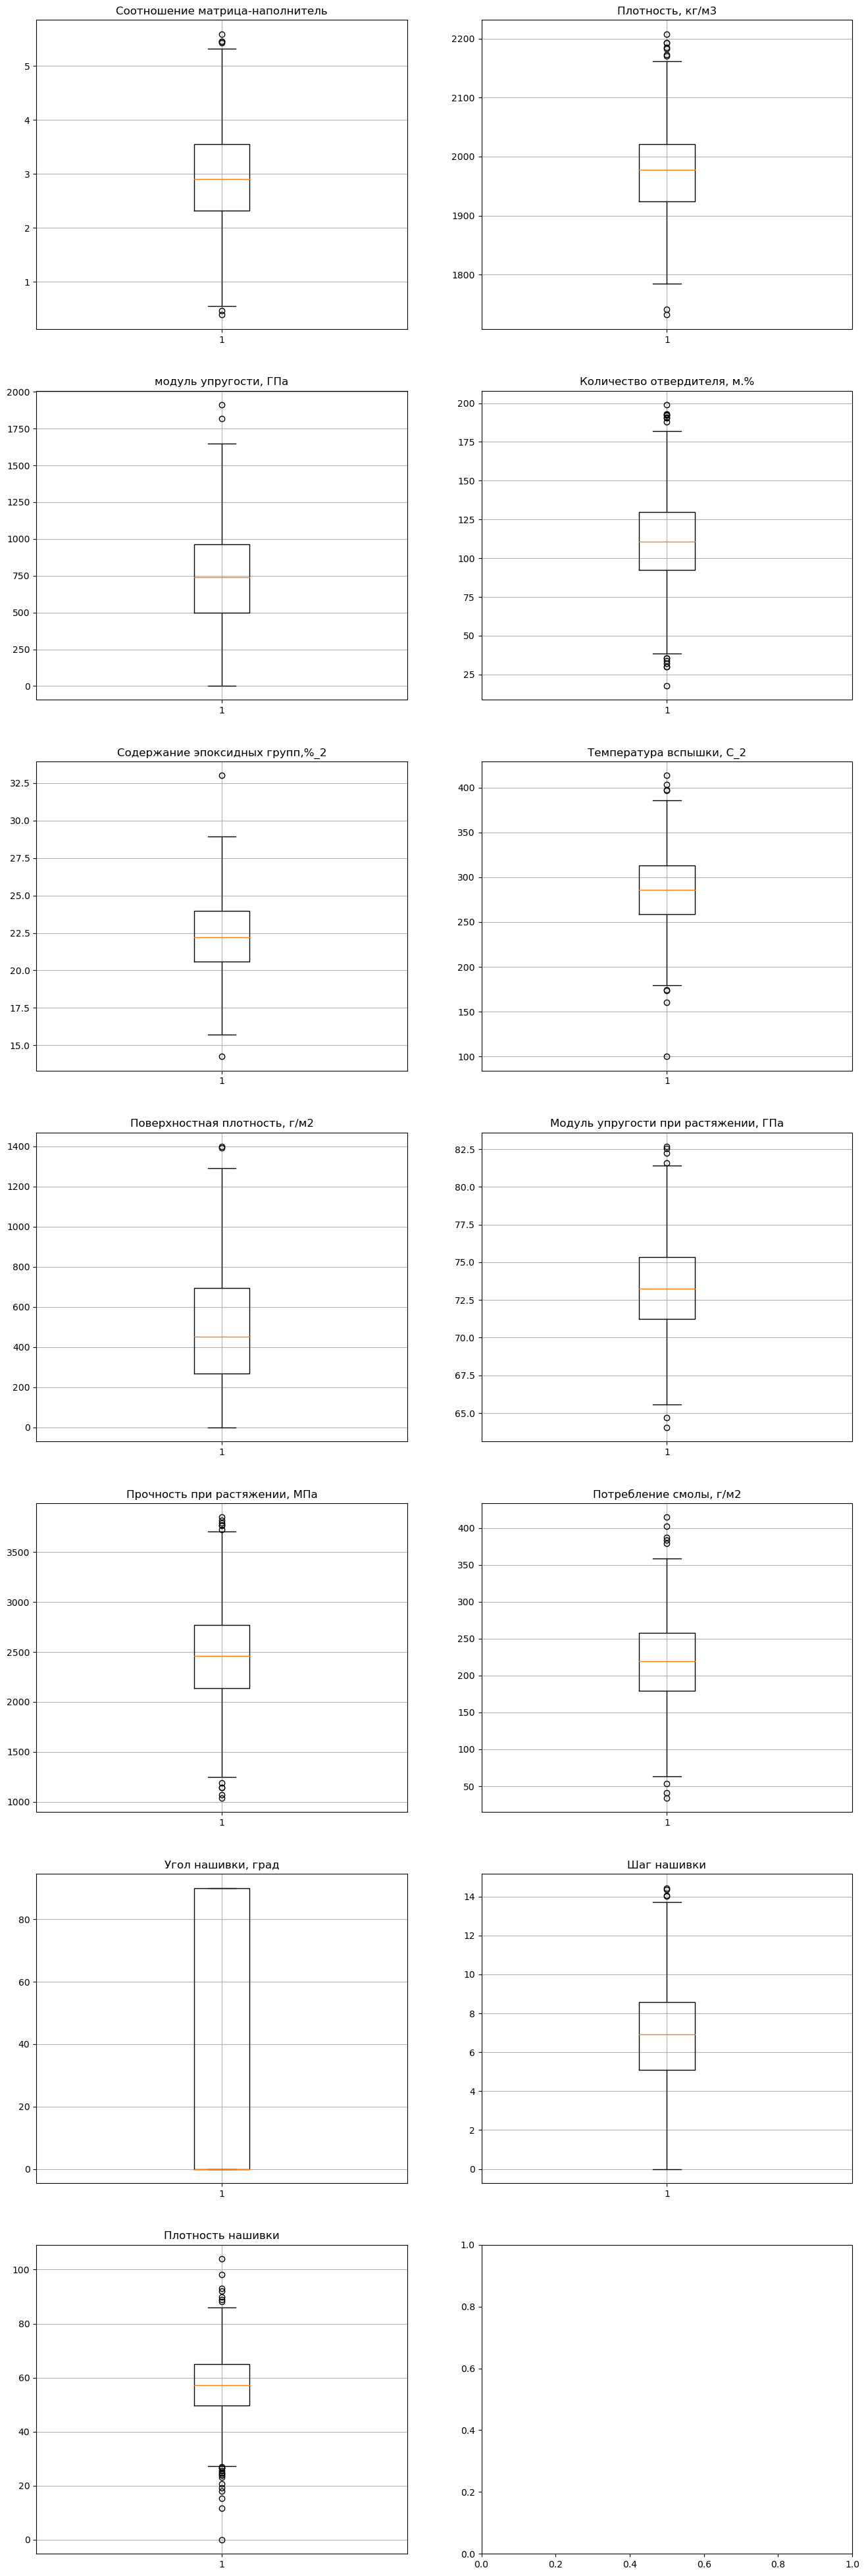

In [21]:
n=7 #кол-во граф по y
m= 2 # кол-во графиков по x


fig, axs = plt.subplots(7,2, figsize=(16,50))
counter=0

for i in range(n):
    for j in range(m):
        if counter != dataset.shape[1]:
            #print(i,j,counter)
            axs[i,j].boxplot(dataset.iloc[:,counter])
            axs[i,j].set_title(dataset.columns[counter])
            axs[i,j].grid()
            
            counter+=1

3.1.2 Построим гистограммы распределения всех признаков датасета raw_dataset
Угол нашивки принимает два значения: 0 и 90 градусов. 
Распределение все остальных признаков имеет колоколообразный вид, что свидетельствует о нормальном распределении данных.
Признак «поверхностная плотность, г/м2» имеет смещенное влево распределение,
что свидельствует о несимметричности распределения.

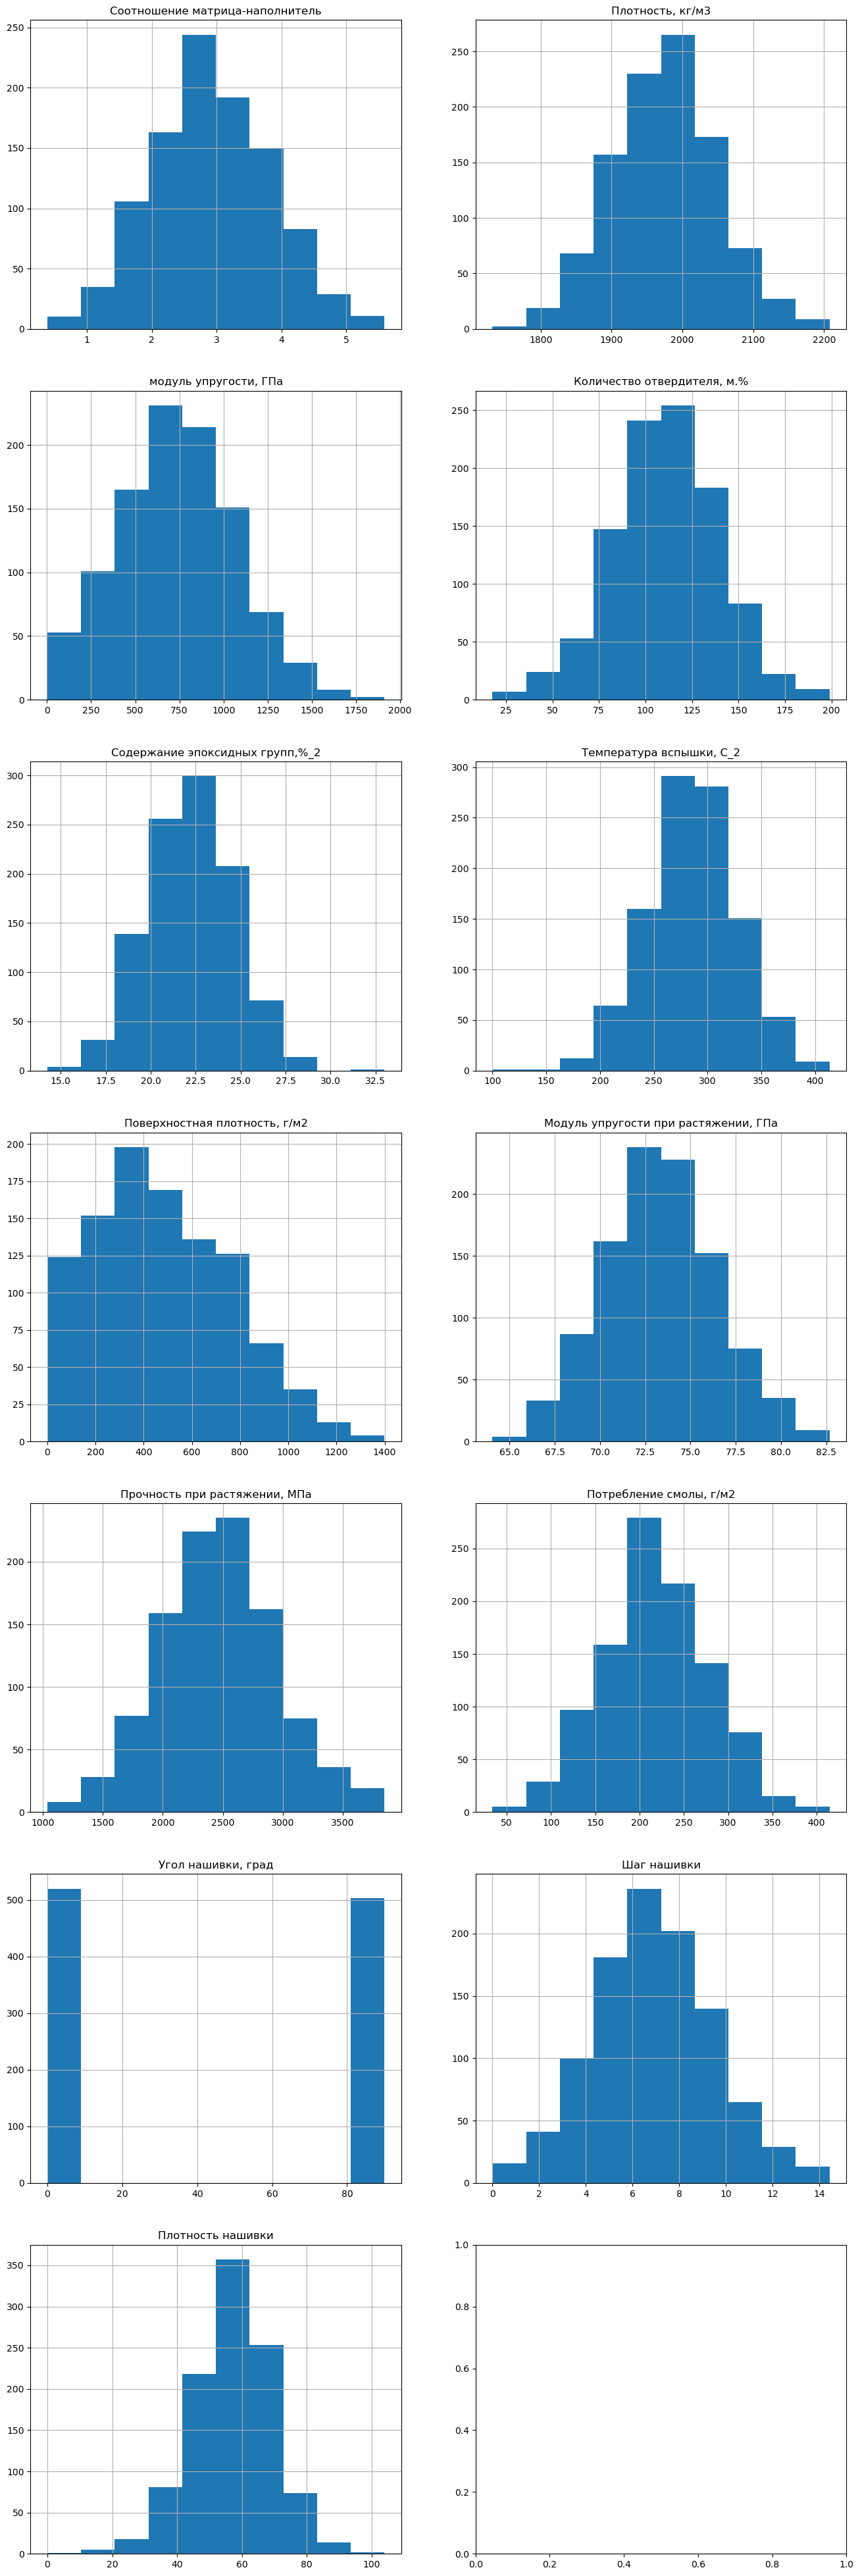

In [23]:
n=7 #кол-во граф по y
m= 2 # кол-во графиков по x


fig, axs = plt.subplots(7,2, figsize=(16,50))
counter=0

for i in range(n):
    for j in range(m):
        if counter != dataset.shape[1]:
            #print(i,j,counter)
            axs[i,j].hist(dataset.iloc[:,counter])
            axs[i,j].set_title(dataset.columns[counter])
            axs[i,j].grid()
            
            counter+=1

3.1.3 
Выведем таблицу с пороговыми значениями 10%-х квантилей для каждой переменной таблицы

In [22]:
bins = dataset.quantile([0, 0.1, 0.2,
                                      0.3, 0.4, 0.5,
                                     0.6, 0.7, 0.8,
                                      0.9, 1])
bins

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.0,0.000000,0.000000
0.1,1.746742,1881.413584,321.141549,75.876923,19.123797,233.163803,117.689109,69.349734,1859.926442,140.515740,0.0,3.708699,41.392033
0.2,2.151230,1912.887237,442.587078,87.217179,20.172913,251.518238,219.694684,70.597252,2055.624091,169.832518,0.0,4.754569,47.586985
0.3,2.450320,1936.105204,563.671171,96.787342,20.980062,265.574407,311.101122,71.697879,2203.637339,188.231874,0.0,5.479312,51.292968
0.4,2.692321,1959.639856,652.458149,104.407507,21.569560,275.368573,379.568089,72.449592,2354.805993,202.319455,0.0,6.256230,54.605293
0.5,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.0,6.916144,57.341920
0.6,3.118545,1993.815802,830.261199,118.248112,22.937779,295.755950,536.124680,74.071474,2578.843678,233.635504,90.0,7.456439,60.142881
0.7,3.400040,2012.960894,918.395850,125.893149,23.554686,305.747301,637.636421,74.877803,2707.683889,248.274168,90.0,8.125016,63.473142
0.8,3.691648,2035.776246,1022.022335,133.921717,24.279605,320.310805,734.617544,75.965243,2852.039101,271.125535,90.0,9.000000,66.912088
0.9,4.145711,2067.142047,1156.976196,146.178965,25.276607,340.692763,865.054165,77.320329,3088.769063,299.213540,90.0,10.181056,72.120302


3.1.4
Создадим копию таблицы удаления выбросов

In [24]:
dataset_filtered = dataset.copy()

3.1.5
Определим пороговые значения 1% и 99% квантилей для каждой из колонок в таблице
и для каждой из колонок датасета оставим значения колонок, которые расположены между 1% и 99% квартилями.

In [25]:
for column in dataset.columns:
    q_low = dataset[column].quantile(0.01)
    q_high = dataset[column].quantile(0.99)
    dataset_filtered[column] = dataset[(dataset[column]<q_high)&(dataset[column]>q_low)][column]

3.1.6
Выводим информацию по таблице с удаленными выбросами dataset_filtered.
Видим, что: 
- класс таблицы - DataFrame; 
- в таблице 1023 строки и 13 столбцов;
- в таблице появились пропущенные значения;
- в колонке 'Угол нашивки, град' удалились все значения;
- в таблице 1 тип данных - float64.

In [32]:
dataset_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1001 non-null   float64
 1   Плотность, кг/м3                      1001 non-null   float64
 2   модуль упругости, ГПа                 1001 non-null   float64
 3   Количество отвердителя, м.%           1001 non-null   float64
 4   Содержание эпоксидных групп,%_2       1001 non-null   float64
 5   Температура вспышки, С_2              1001 non-null   float64
 6   Поверхностная плотность, г/м2         1001 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1001 non-null   float64
 8   Прочность при растяжении, МПа         1001 non-null   float64
 9   Потребление смолы, г/м2               1001 non-null   float64
 10  Угол нашивки, град                    0 non-null      float64
 11  Шаг нашивки      

3.1.7 Получаем описание таблицы dataset_filtered с использованием статистических параметров.
Узнаем, что: 
- во всех столбцах кроме 'Угол нашивки, град' количество значений соответствует 1001; 
- средние значения между столбцами несопоставимы;
- видим стандартное квадратическое отклонение, пороговые значения для 25, 50 и 75% квартилей, минимальные и максимальные значения данных по столбцам датасета.

In [27]:
dataset_filtered.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,0.0,1001.000000,1001.000000
mean,2.928925,1975.575929,738.051149,110.560795,22.239659,285.955472,479.507602,73.321511,2466.664046,218.412490,NaN,6.895600,57.208025
std,0.857033,68.689722,311.285476,26.223299,2.245274,38.040756,267.928766,2.928767,453.609193,55.878559,NaN,2.392405,11.246727
min,0.960288,1813.234600,37.954595,43.132583,16.977083,193.431144,12.040487,66.522175,1348.288251,86.569522,NaN,1.147753,26.559894
25%,2.337851,1925.610616,507.656797,92.834720,20.625658,259.487883,269.230234,71.324760,2147.576085,180.225006,NaN,5.117477,50.031691
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,NaN,6.916144,57.341920
75%,3.547354,2020.947411,956.246864,129.261262,23.946868,312.425316,688.874406,75.312292,2757.130303,256.737402,NaN,8.565812,64.619238
max,5.045725,2150.793053,1501.915969,173.254326,27.519471,380.452875,1166.628925,80.419862,3656.158363,347.995377,NaN,13.246219,84.669111


In [37]:
dataset_filtered.head(15)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,NaN,22.267857,NaN,210.0,70.000000,3000.000000,220.0,NaN,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.000000,3000.000000,220.0,NaN,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,NaN,284.615385,210.0,70.000000,3000.000000,220.0,NaN,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.000000,3000.000000,220.0,NaN,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,NaN,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,NaN,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,NaN,5.0,70.0
7,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.000000,1800.000000,120.0,NaN,7.0,47.0
8,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.000000,1800.000000,120.0,NaN,7.0,57.0
9,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.000000,2000.000000,300.0,NaN,7.0,60.0


3.1.8 
Создадим dataset_median (копию таблицы dataset_filtered) для добавления медианы в пустые значения

In [29]:
dataset_median= dataset_filtered.copy()

3.1.9
Заполним пустые значения таблицы медианными значениями из первичной таблицы

In [30]:
for column in dataset.columns:
    dataset_median[column] = dataset_filtered[column].fillna(dataset_filtered[column].median())

In [38]:
dataset_median.head(15)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,110.56484,22.267857,285.896812,210.0,70.000000,3000.000000,220.0,NaN,4.0,57.0
1,1.857143,2030.000000,738.736842,50.00000,23.750000,284.615385,210.0,70.000000,3000.000000,220.0,NaN,4.0,60.0
2,1.857143,2030.000000,738.736842,49.90000,22.230744,284.615385,210.0,70.000000,3000.000000,220.0,NaN,4.0,70.0
3,1.857143,2030.000000,738.736842,129.00000,21.250000,300.000000,210.0,70.000000,3000.000000,220.0,NaN,5.0,47.0
4,2.771331,2030.000000,753.000000,111.86000,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,NaN,5.0,57.0
5,2.767918,2000.000000,748.000000,111.86000,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,NaN,5.0,60.0
6,2.569620,1910.000000,807.000000,111.86000,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,NaN,5.0,70.0
7,2.561475,1900.000000,535.000000,111.86000,22.267857,284.615385,380.0,75.000000,1800.000000,120.0,NaN,7.0,47.0
8,3.557018,1930.000000,889.000000,129.00000,21.250000,300.000000,380.0,75.000000,1800.000000,120.0,NaN,7.0,57.0
9,3.532338,2100.000000,1421.000000,129.00000,21.250000,300.000000,1010.0,78.000000,2000.000000,300.0,NaN,7.0,60.0


3.1.10
Выведем информацию по таблице, которая получилась после удаления выбросов и заполнения пропусков медианными значениями.
Видим, что: 
- класс таблицы - DataFrame; 
- в таблице 1023 строки и 13 столбцов;
- в переменной «Угол нашивки, град» отсутствуют значения;
- в таблице 1 тип данных - float64.

In [31]:
dataset_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    0 non-null      float64
 11  Шаг нашивки      

3.1.10
Получаем описание таблицы dataset_median с использованием статистических параметров.
Узнаем, что: 
- во всех столбцах кроме 'Угол нашивки, град' количество значений соответствует 1023; 
- средние значения между столбцами несопоставимы;
- видим стандартное квадратическое отклонение, пороговые значения для 25, 50 и 75% квантилей, минимальные и максимальные значения данных по столбцам датасета;
- у показателя 'Угол нашивки, град' отсутствуют значения.

In [39]:
dataset_median.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,0.0,1023.000000,1023.000000
mean,2.928450,1975.619923,738.085841,110.560882,22.239468,285.954210,478.913124,73.320378,2466.510508,218.429402,NaN,6.896042,57.210905
std,0.847764,67.947027,307.916907,25.939517,2.220977,37.629089,265.059668,2.897083,448.701537,55.273972,NaN,2.366517,11.125035
min,0.960288,1813.234600,37.954595,43.132583,16.977083,193.431144,12.040487,66.522175,1348.288251,86.569522,NaN,1.147753,26.559894
25%,2.346103,1926.580132,516.951072,93.162486,20.670714,260.810531,273.393440,71.338137,2153.995024,180.647272,NaN,5.161456,50.214792
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,NaN,6.916144,57.341920
75%,3.534284,2019.972661,950.855046,129.000000,23.907223,311.338759,681.098524,75.270110,2751.668715,256.109107,NaN,8.505672,64.520026
max,5.045725,2150.793053,1501.915969,173.254326,27.519471,380.452875,1166.628925,80.419862,3656.158363,347.995377,NaN,13.246219,84.669111


3.1.11
Проверим наличие занчений у столбца 'Угол нашивки, град'
Видим, что массив содердит NAN (not a number).

In [40]:
dataset_median.iloc[:,10].unique()

array([nan])

3.1.12
Создадим returnraw_Ugol (копию dataset_median) для возвращения первоначальных значений столбцу 'Угол нашивки, град'

In [41]:
dataset_returnraw_Ugol = dataset_median.copy()

In [42]:
dataset_returnraw_Ugol['Угол нашивки, град'] = dataset['Угол нашивки, град']

3.1.13
Выводим информацию по таблице, которая получилась после возвращения первоначальных значений столбцу 'Угол нашивки, град'.
Видим, что: 
- класс таблицы - DataFrame; 
- в таблице 1023 строки и 13 столбцов;
- у всех параметров кроме 'Угол нашивки, град' есть пропущенные значения;
- в таблице 1 тип данных - float64.

In [43]:
dataset_returnraw_Ugol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [44]:
dataset_returnraw_Ugol.iloc[:,10].unique()

array([ 0, 90], dtype=int64)

In [45]:
dataset_returnraw_Ugol.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,-0.007381,0.015662,-0.002825,0.030513,-0.029060,-0.012985,0.004505,0.032492,0.064742,-0.028062,0.035726,0.028677
"Плотность, кг/м3",-0.007381,1.000000,-0.004376,-0.042036,-0.008461,-0.038720,0.062068,-0.040919,-0.052700,-0.020261,-0.055388,-0.041244,0.080477
"модуль упругости, ГПа",0.015662,-0.004376,1.000000,0.034382,-0.012978,0.031254,-0.032997,-0.035886,0.031739,0.013993,-0.053923,0.018160,0.075360
"Количество отвердителя, м.%",-0.002825,-0.042036,0.034382,1.000000,-0.023023,0.072976,0.041064,-0.048053,-0.062048,-0.016515,0.024815,-0.035060,0.008710
"Содержание эпоксидных групп,%_2",0.030513,-0.008461,-0.012978,-0.023023,1.000000,-0.029899,0.008158,0.035996,-0.025729,0.006152,0.003986,-0.003782,-0.026882
"Температура вспышки, С_2",-0.029060,-0.038720,0.031254,0.072976,-0.029899,1.000000,0.040573,-0.006231,-0.021015,0.042665,0.008238,0.054381,0.024113
"Поверхностная плотность, г/м2",-0.012985,0.062068,-0.032997,0.041064,0.008158,0.040573,1.000000,0.039442,-0.022888,-0.015268,0.040419,0.025031,-0.056947
"Модуль упругости при растяжении, ГПа",0.004505,-0.040919,-0.035886,-0.048053,0.035996,-0.006231,0.039442,1.000000,0.004063,0.070292,0.011300,-0.020474,-0.015811
"Прочность при растяжении, МПа",0.032492,-0.052700,0.031739,-0.062048,-0.025729,-0.021015,-0.022888,0.004063,1.000000,0.011233,0.025927,-0.082577,0.018675
"Потребление смолы, г/м2",0.064742,-0.020261,0.013993,-0.016515,0.006152,0.042665,-0.015268,0.070292,0.011233,1.000000,0.013696,0.007180,0.013506


In [46]:
dataset_returnraw_Ugol.corr().to_excel('output.xlsx')

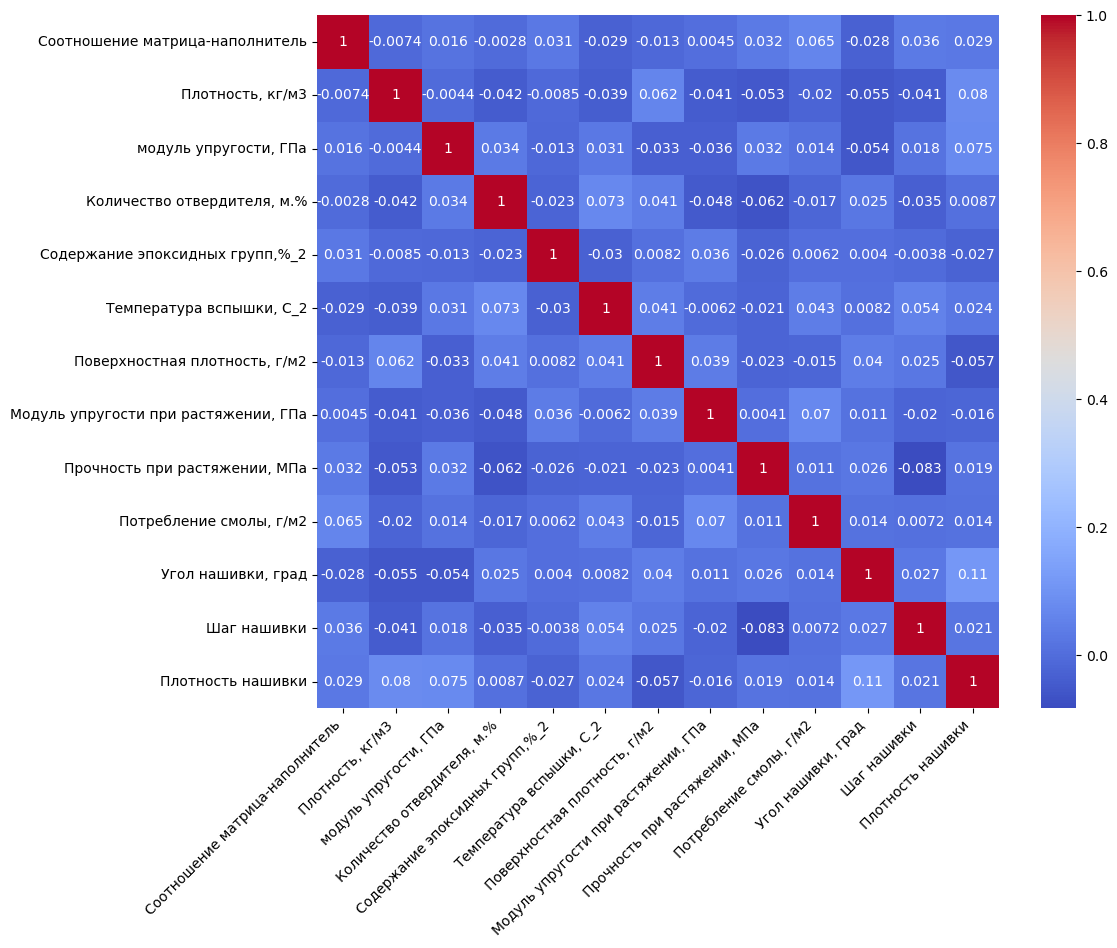

In [47]:
f,ax = plt.subplots(figsize=(11,9))
sns.heatmap(dataset_returnraw_Ugol.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right');

## 3.2 Нормализация

3.2.1
Созададим таблицу для нормализации, из которой исключим целевые переменные нашего исследования:
- Модуль упругости при растяжении, ГПа;
- Прочность при растяжении, МПа.

In [48]:
df_drop_target1 = dataset_returnraw_Ugol.drop(['Модуль упругости при растяжении, ГПа'], axis=1)

In [49]:
df_drop_target2 = df_drop_target1.drop(['Прочность при растяжении, МПа'], axis=1)

In [50]:
df_drop_target2

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,110.564840,22.267857,285.896812,210.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,22.230744,284.615385,210.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,197.126067,90,6.313201,58.261074


3.2.2
Выведем столбцы новой таблицы.
Видим, что целевые столбцы удалены.

In [51]:
df_drop_target2.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [52]:
dataset_transformed = Normalizer().fit_transform(df_drop_target2)

In [53]:
dataset_transformed


array([[8.42689552e-04, 9.21124502e-01, 3.35206210e-01, ...,
        0.00000000e+00, 1.81502365e-03, 2.58640870e-02],
       [8.43561591e-04, 9.22077708e-01, 3.35553091e-01, ...,
        0.00000000e+00, 1.81690189e-03, 2.72535283e-02],
       [8.43455431e-04, 9.21961667e-01, 3.35510862e-01, ...,
        0.00000000e+00, 1.81667324e-03, 3.17917816e-02],
       ...,
       [1.50445154e-03, 9.04509948e-01, 1.91156951e-01, ...,
        4.12730761e-02, 1.90826250e-03, 3.10142789e-02],
       [1.59752692e-03, 8.91081059e-01, 3.19680115e-01, ...,
        3.88026438e-02, 2.72187643e-03, 2.51187077e-02],
       [1.79839656e-03, 8.92777100e-01, 1.97084067e-01, ...,
        4.25038968e-02, 2.87085563e-03, 3.65696293e-02]])

In [54]:
type(dataset_transformed)

numpy.ndarray

In [55]:
normalized_dataset=pd.DataFrame(dataset_transformed, columns=df_drop_target2.columns)

In [56]:
normalized_dataset

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.000843,0.921125,0.335206,0.050169,0.010104,0.129727,0.095289,0.099826,0.000000,0.001815,0.025864
1,0.000844,0.922078,0.335553,0.022711,0.010788,0.129280,0.095387,0.099930,0.000000,0.001817,0.027254
2,0.000843,0.921962,0.335511,0.022663,0.010096,0.129263,0.095375,0.099917,0.000000,0.001817,0.031792
3,0.000842,0.920026,0.334806,0.058465,0.009631,0.135964,0.095175,0.099707,0.000000,0.002266,0.021301
4,0.001255,0.919154,0.340947,0.050649,0.010083,0.128870,0.095085,0.099613,0.000000,0.002264,0.025809
...,...,...,...,...,...,...,...,...,...,...,...
1018,0.001034,0.888489,0.415484,0.039594,0.009159,0.147821,0.095216,0.056897,0.040963,0.004131,0.021401
1019,0.001600,0.952253,0.206575,0.067808,0.009104,0.118081,0.162880,0.054685,0.041804,0.004908,0.024967
1020,0.001504,0.904510,0.191157,0.050690,0.010987,0.113924,0.339422,0.108505,0.041273,0.001908,0.031014
1021,0.001598,0.891081,0.319680,0.060962,0.008298,0.118900,0.276563,0.084989,0.038803,0.002722,0.025119


In [57]:
normalized_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  1023 non-null   float64
 1   Плотность, кг/м3                 1023 non-null   float64
 2   модуль упругости, ГПа            1023 non-null   float64
 3   Количество отвердителя, м.%      1023 non-null   float64
 4   Содержание эпоксидных групп,%_2  1023 non-null   float64
 5   Температура вспышки, С_2         1023 non-null   float64
 6   Поверхностная плотность, г/м2    1023 non-null   float64
 7   Потребление смолы, г/м2          1023 non-null   float64
 8   Угол нашивки, град               1023 non-null   float64
 9   Шаг нашивки                      1023 non-null   float64
 10  Плотность нашивки                1023 non-null   float64
dtypes: float64(11)
memory usage: 88.0 KB


In [58]:
normalized_dataset.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,0.001317,0.887411,0.325864,0.049689,0.010000,0.128500,0.212052,0.098161,0.019950,0.003099,0.025707
std,0.000391,0.047119,0.123359,0.011967,0.001174,0.018102,0.112212,0.025464,0.020365,0.001080,0.005149
min,0.000407,0.726659,0.018426,0.017381,0.007051,0.077441,0.005326,0.038806,0.000000,0.000503,0.011432
25%,0.001041,0.856142,0.239393,0.041875,0.009218,0.116194,0.124276,0.080827,0.000000,0.002339,0.022462
50%,0.001296,0.890604,0.332547,0.049607,0.009953,0.128530,0.205131,0.097146,0.000000,0.003093,0.025681
75%,0.001592,0.924179,0.415767,0.058308,0.010837,0.140655,0.298754,0.115659,0.040598,0.003793,0.029216
max,0.002409,0.981231,0.595001,0.084920,0.013378,0.185309,0.525231,0.169124,0.048575,0.006167,0.040841


Смотрим корреляции, 
первого порядка, чуть-чуть второго порядка, далее не видит.
коэффициент корреляции не все зависимости видит. линейные видит

In [60]:
pd.concat([normalized_dataset, dataset_returnraw_Ugol[['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа']]], axis=1, join='inner').corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Прочность при растяжении, МПа","Модуль упругости при растяжении, ГПа"
Соотношение матрица-наполнитель,1.000000,0.174262,-0.110168,0.049764,0.140341,0.044722,-0.089234,0.102094,-0.011834,0.069454,0.073801,0.033354,0.005655
"Плотность, кг/м3",0.174262,1.000000,-0.773916,0.144157,0.421874,0.252574,-0.409253,0.138178,0.060619,0.096036,0.234297,-0.020420,-0.004804
"модуль упругости, ГПа",-0.110168,-0.773916,1.000000,-0.127840,-0.336497,-0.249182,-0.175550,-0.134816,-0.091681,-0.094256,-0.115045,0.042561,-0.038394
"Количество отвердителя, м.%",0.049764,0.144157,-0.127840,1.000000,0.097693,0.148875,-0.059179,0.033006,0.042673,0.000910,0.060392,-0.052432,-0.042535
"Содержание эпоксидных групп,%_2",0.140341,0.421874,-0.336497,0.097693,1.000000,0.160928,-0.178921,0.108654,0.052349,0.078746,0.100392,-0.014458,0.041417
"Температура вспышки, С_2",0.044722,0.252574,-0.249182,0.148875,0.160928,1.000000,-0.120202,0.110481,0.054615,0.106628,0.109106,-0.016634,0.001527
"Поверхностная плотность, г/м2",-0.089234,-0.409253,-0.175550,-0.059179,-0.178921,-0.120202,1.000000,-0.105586,0.029420,-0.034487,-0.169628,-0.019959,0.041622
"Потребление смолы, г/м2",0.102094,0.138178,-0.134816,0.033006,0.108654,0.110481,-0.105586,1.000000,0.033469,0.032833,0.054428,0.014548,0.073690
"Угол нашивки, град",-0.011834,0.060619,-0.091681,0.042673,0.052349,0.054615,0.029420,0.033469,1.000000,0.044075,0.145321,0.024091,0.009368
Шаг нашивки,0.069454,0.096036,-0.094256,0.000910,0.078746,0.106628,-0.034487,0.032833,0.044075,1.000000,0.059095,-0.079954,-0.017236


целевые не связаны с фичями

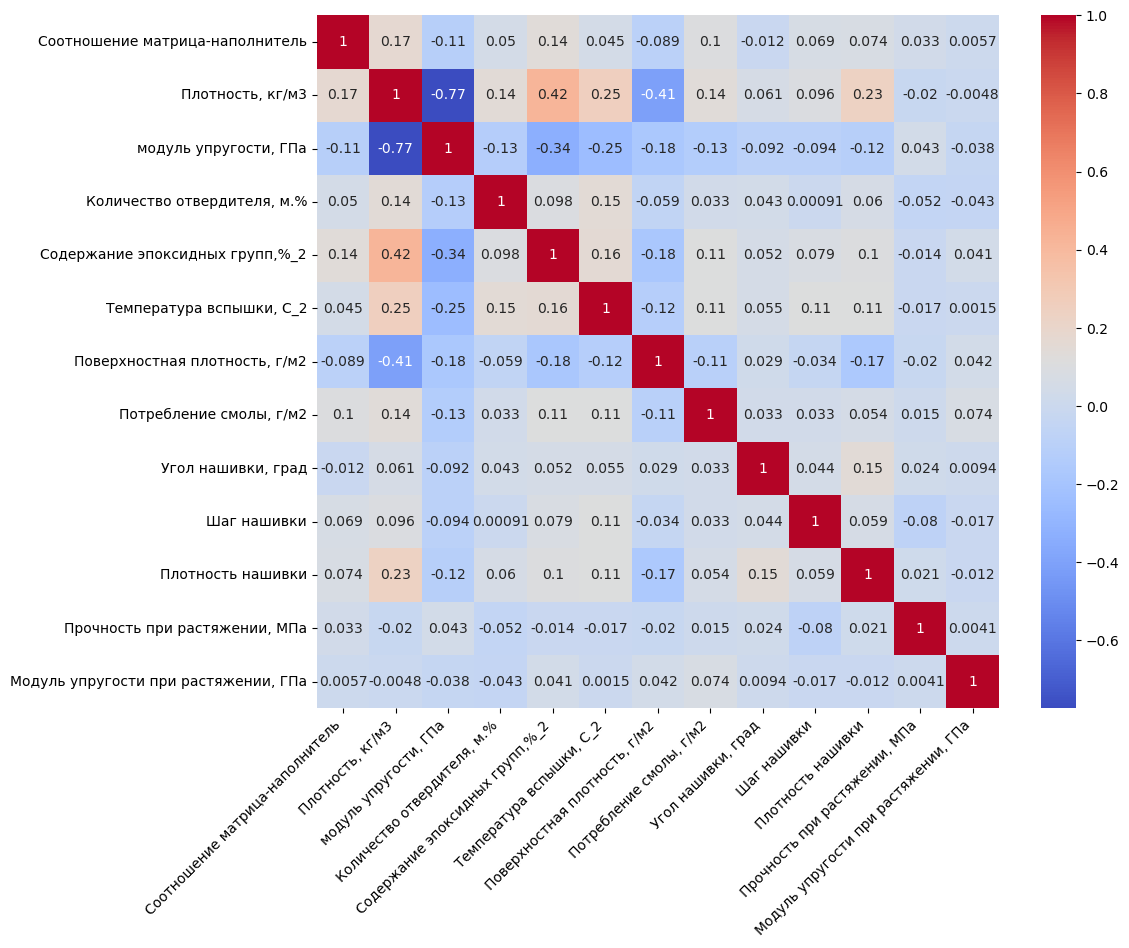

In [61]:
f,ax = plt.subplots(figsize=(11,9))
sns.heatmap(pd.concat([normalized_dataset, dataset_returnraw_Ugol[['Прочность при растяжении, МПа', 'Модуль упругости при растяжении, ГПа']]], axis=1, join='inner').corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right');

# IV Обучение модели

Обучить алгоритм машинного обучения, который будет определять значения:
-	Модуль упругости при растяжении, ГПа
-	Прочность при растяжении, МПа

## 4.1 Отбор и выделение признаков 

4.1.1
Создадим df (копию normalized_dataset) для операции по отбору и выделению признаков

In [62]:
df =  normalized_dataset.copy()

4.1.2 
поместим целевые переменные 'Модуль упругости при растяжении, ГПа' и  'Прочность при растяжении, МПа' в переменные y_upr и y_prochn

In [63]:
y_upr = dataset_returnraw_Ugol[['Модуль упругости при растяжении, ГПа']]
y_prochn = dataset_returnraw_Ugol[['Прочность при растяжении, МПа']]

4.1.3
отберем все признаки и поместим их в переменные x_upr и x_prochn

In [64]:
x_upr = df.copy()
x_prochn = df.copy()

4.1.4 
разобьем данные на обучающую (X_train_upr,y_train_upr,X_train_prochn,y_train_prochn)
и тестовую (X_test_upr,y_test_upr,X_test_prochn, y_test_prochn) выборки
Размер тестовой выборки определим 10%, random_state определим 42.

In [65]:
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.1, random_state=42)
X_train_prochn, X_test_prochn, y_train_prochn, y_test_prochn = train_test_split(x_prochn, y_prochn, test_size=0.1, random_state=42)

4.1.5
посмотрим на новую размерность обучающей и тестовой выборки для признака Модуль упругости при растяжении, ГПа

In [66]:
X_train_upr.shape, y_train_upr.shape, X_test_upr.shape, y_test_upr.shape

((920, 11), (920, 1), (103, 11), (103, 1))

4.1.5
посмотрим на новую размерность обучающей и тестовой выборки для признака Прочность при растяжении, МПа

In [67]:
X_train_prochn.shape, y_train_prochn.shape, X_test_prochn.shape, y_test_prochn.shape

((920, 11), (920, 1), (103, 11), (103, 1))

## 4.2 Регрессионные модели МО 

### 4.2.1 LinearRegression

4.2.1.1 
?создадим объект этого класса и запишем в переменную model

In [77]:
model_LR_upr = LinearRegression()
model_LR_prochn = LinearRegression()

4.2.1.2 
обучим модель model_LR для переменной Модуль упругости при растяжении, ГПа

In [78]:
model_LR_upr.fit(X_train_upr, y_train_upr)
model_LR_prochn.fit(X_train_prochn, y_train_prochn)

LinearRegression()

4.2.1.3
на основе всех независимых переменных x предскажем y

In [70]:
model_LR_upr.predict(X_test_upr)

array([[73.28196815],
       [73.50729974],
       [73.33698566],
       [73.50345309],
       [73.60329199],
       [72.95776599],
       [73.34308726],
       [73.11582139],
       [73.31555817],
       [73.60325307],
       [72.65226026],
       [72.84963056],
       [73.18180685],
       [73.69988813],
       [73.53968919],
       [73.23099875],
       [73.43086258],
       [73.08338593],
       [73.6357866 ],
       [73.30891875],
       [73.49161671],
       [73.29564646],
       [73.31425803],
       [73.11154285],
       [74.02831276],
       [73.28329628],
       [73.50336562],
       [73.41287739],
       [73.26837756],
       [73.03838755],
       [73.13140214],
       [72.58015222],
       [73.64338532],
       [73.53662146],
       [73.2991373 ],
       [73.97043329],
       [73.41776077],
       [72.75156258],
       [73.56441957],
       [73.23043864],
       [73.2293355 ],
       [73.88421714],
       [72.93257498],
       [73.05021835],
       [73.53528335],
       [73

4.2.1.4
рассчитаем среднюю квадратическую ошибку, сравним тестовые и прогнозные значения модуля упругости при растяжении, ГПа

In [96]:
print('MSE_LR_upr:', np.round(mean_squared_error(y_test_upr, model_LR_upr.predict(X_test_upr)), 2))
print('MSE_LR_prochn', np.round(mean_squared_error(y_test_prochn, model_LR_prochn.predict(X_test_prochn)),2))

MSE_LR_upr: 8.6
MSE_LR_prochn 171312.39


4.2.1.5
Значение MSE для модели линейной регрессии соответствует 8,59

4.2.1.6
Выведем корень среднеквадратической ошибки RMSE_LR

4.2.1.7
Значение RMSE_LR составляет 2,93

In [101]:
print('RMSE_LR_upr:', np.round(mean_squared_error(y_test_upr, model_LR_upr.predict(X_test_upr), squared=False),2))
print('RMSE_LR_prochn:', np.round(mean_squared_error(y_test_prochn, model_LR_prochn.predict(X_test_prochn), squared=False),2))

RMSE_LR_upr: 2.93
RMSE_LR_prochn: 413.9


4.2.1.8
Выведем значение коэффицианта детерминации R2, показывающего качество модели.
Значение равно 1% - чрезвычайно низкое значение.

In [89]:
print('R2_upr:', np.round(metrics.r2_score(y_test_upr, model_LR_upr.predict(X_test_upr)), 2))
print('R2_prochn:', np.round(metrics.r2_score(y_test_prochn, model_LR_prochn.predict(X_test_prochn)), 2))

R2_upr: 0.01
R2_prochn: -0.01


### 4.2.2 model_Lasso

4.2.2.1 
Обратимся к модели Лассо, попробуем улучишь метрики, полученные линейной регрессией.
Перебираем значения гиперпараметра alpha
Остановимся на alpha=0.2

In [103]:
model_Lasso_upr = linear_model.Lasso(alpha=0.2)
model_Lasso_upr.fit(X_train_upr, y_train_upr)

Lasso(alpha=0.2)

In [104]:
predict_Lasso_upr = model_Lasso_upr.predict(X_test_upr)

4.2.2Д
Выведем корень среднеквадратической ошибки RMSE_LR

In [114]:
print('RMSE_Lasso_upr:', np.round(mean_squared_error(y_test_upr, predict_Lasso_upr, squared=False), 2))
print('MSE_Lasso_upr:', np.round(mean_squared_error(y_test_upr, predict_Lasso_upr), 2))
print('R2:', np.round(metrics.r2_score(y_test_upr, model_Lasso_upr.predict(X_test_upr)), 2))

RMSE_Lasso_upr: 2.95
MSE_Lasso_upr: 8.7
R2: -0.0


In [117]:
model_Lasso_prochn = linear_model.Lasso(alpha=0.2)
model_Lasso_prochn.fit(X_train_prochn, y_train_prochn)

Lasso(alpha=0.2)

In [118]:
predict_Lasso_prochn = model_Lasso_prochn.predict(X_test_prochn)

In [119]:
print('RMSE_Lasso_prochn:', np.round(mean_squared_error(y_test_prochn, predict_Lasso_prochn, squared=False), 2))
print('MSE_Lasso_prochn:', np.round(mean_squared_error(y_test_prochn, predict_Lasso_prochn), 2))
print('R2:', np.round(metrics.r2_score(y_test_prochn, model_Lasso_prochn.predict(X_test_prochn)), 2))

RMSE_Lasso_prochn: 412.0
MSE_Lasso_prochn: 169742.21
R2: -0.0


### 4.2.3 DecisionTreeRegressorn

In [120]:
model_Tree_upr = DecisionTreeRegressor(max_depth = 10, random_state=42)

In [121]:
model_Tree_upr.fit(X_train_upr, y_train_upr)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [122]:
#model_Tree.predict(X_test_upr)

In [123]:
mean_squared_error(y_test_upr, model_Tree_upr.predict(X_test_upr), squared = False)

3.132480572950392

In [124]:
params = {
    'max_depth':[1,10,15,100,200, None],
    'min_samples_leaf' : [1,2,5,20]
}

In [142]:
DTR_gr_upr=DecisionTreeRegressor(random_state=42)

In [144]:
grid_search_upr = GridSearchCV(DTR_gr_upr, params)

In [145]:
grid_search_upr.fit(X_train_upr, y_train_upr)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 10, 15, 100, 200, None],
                         'min_samples_leaf': [1, 2, 5, 20]})

In [146]:
grid_search_upr.predict(X_test_upr)

array([73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 78.57430765, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30

In [148]:
predict_upr = grid_search_upr.predict(X_test_upr)

In [149]:
mean_squared_error(y_test_upr, predict_upr, squared = False)

3.0465834720525984

In [150]:
r2_dtr_upr = np.round(metrics.r2_score(y_test_upr, grid_search_upr.predict(X_test_upr)), 2)

In [151]:
r2_dtr_upr

-0.07

In [152]:
print('R2:', np.round(metrics.r2_score(y_test_upr, grid_search_upr.predict(X_test_upr)), 2))

R2: -0.07


In [133]:
from sklearn.metrics import r2_score #не надо все метрики

In [134]:
r2_score(y_test_upr, predict)

-0.0671991288740712

In [135]:
model_Tree_prochn = DecisionTreeRegressor(max_depth = 10, random_state=42)

In [136]:
model_Tree_prochn.fit(X_train_prochn, y_train_prochn)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [140]:
mean_squared_error(y_test_prochn, model_Tree_prochn.predict(X_test_prochn), squared = False)

471.5975330138962

In [153]:
params_prochn = {
    'max_depth':[1,10,15,100,200, None],
    'min_samples_leaf' : [1,2,5,20]
}

In [154]:
DTR_gr_prochn=DecisionTreeRegressor(random_state=42)

In [155]:
grid_search_prochn = GridSearchCV(DTR_gr_upr, params)

In [156]:
grid_search_prochn.fit(X_train_upr, y_train_upr)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 10, 15, 100, 200, None],
                         'min_samples_leaf': [1, 2, 5, 20]})

In [160]:
grid_search_prochn.predict(X_test_prochn)

array([73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 78.57430765, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30252787,
       73.30252787, 73.30252787, 73.30252787, 73.30252787, 73.30

In [161]:
predict_prochn = grid_search_prochn.predict(X_test_upr)

In [162]:
mean_squared_error(y_test_prochn, predict_prochn, squared = False)

2418.594278257055

In [163]:
print('R2:', np.round(metrics.r2_score(y_test_prochn, grid_search_prochn.predict(X_test_prochn)), 2))

R2: -33.54


### 4.2.6 KNeighborsRegressor

In [164]:
model_KNR_upr = KNeighborsRegressor()

In [165]:
model_KNR_upr.fit(X_train_upr, y_train_upr)

KNeighborsRegressor()

In [166]:
model_KNR_upr.predict(X_test_upr)

array([[72.7677748 ],
       [73.58508403],
       [72.69998118],
       [72.61524791],
       [73.33554317],
       [73.02026634],
       [74.55265998],
       [73.64680514],
       [71.27961434],
       [73.12719144],
       [73.2425207 ],
       [73.44413238],
       [72.47887597],
       [73.50441714],
       [75.80696973],
       [71.98064699],
       [71.78250723],
       [72.89171158],
       [72.94394091],
       [73.25277425],
       [73.56514417],
       [74.64847709],
       [73.46243628],
       [73.46311768],
       [71.67435536],
       [72.64938707],
       [72.04412551],
       [72.5993562 ],
       [74.89053714],
       [74.08654117],
       [74.79322704],
       [73.33746523],
       [73.54778242],
       [74.12027893],
       [72.07549478],
       [75.39408765],
       [73.72074861],
       [72.58725253],
       [72.46661338],
       [73.78967056],
       [73.88619167],
       [75.40818265],
       [74.78865176],
       [72.36940572],
       [72.40035586],
       [71

In [167]:
RMSE_KNR_upr = mean_squared_error(y_test_upr, model_KNR_upr.predict(X_test_upr))

In [168]:
RMSE_KNR_upr

9.413859808116088

In [170]:
mean_squared_error(y_test_upr, model_KNR_upr.predict(X_test_upr), squared=False )

3.0682013962769927

In [171]:
print('R2:', np.round(metrics.r2_score(y_test_upr, model_KNR_upr.predict(X_test_upr)), 2))

R2: -0.08


In [173]:
params = {
    'n_neighbors':[1,2,5,10,20],
    'weights': ["uniform", 'distance']
}

создаем новую копию алгоритма

In [174]:
KNR_gr_upr=KNeighborsRegressor()

In [175]:
grid_search_KNR_upr = GridSearchCV(KNR_gr_upr, params)

In [176]:
grid_search_KNR_upr.fit(X_train_upr, y_train_upr)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 20],
                         'weights': ['uniform', 'distance']})

In [177]:
grid_search_KNR_upr.predict(X_test_upr)

array([[71.87028255],
       [73.08956818],
       [73.37482029],
       [74.3134225 ],
       [74.00692323],
       [73.1428216 ],
       [74.16851384],
       [73.90115762],
       [72.65808244],
       [73.16086233],
       [73.18427335],
       [73.42157276],
       [72.74841189],
       [73.62697983],
       [74.150095  ],
       [72.71022847],
       [73.08633297],
       [72.79091814],
       [74.01713744],
       [73.19907323],
       [73.15964175],
       [73.593452  ],
       [74.0250771 ],
       [72.95344912],
       [73.19934297],
       [72.72970029],
       [73.02604211],
       [72.08664065],
       [74.21728335],
       [73.11144043],
       [74.42704163],
       [73.50585243],
       [73.63540126],
       [73.74331587],
       [73.27943331],
       [74.07397626],
       [72.71235267],
       [72.23614383],
       [73.02596947],
       [73.79830671],
       [73.59321988],
       [74.38814469],
       [73.50818483],
       [72.5316118 ],
       [73.29576127],
       [72

лучишим оказался 20. то есть берет максимум и усредняет. если вписать соседей 500 возьмет 500. то есть не видит взаимосвязи. модель не может предсказывать нормально

In [178]:
grid_search_KNR_upr.best_estimator_

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [179]:
r2_KNR_upr = np.round(metrics.r2_score(y_test_upr, grid_search_KNR_upr.predict(X_test_upr)), 2)

In [180]:
print(r2_KNR_upr)

-0.03


In [181]:
model_KNR_prochn = KNeighborsRegressor()

In [182]:
model_KNR_prochn.fit(X_train_prochn, y_train_prochn)

KNeighborsRegressor()

In [183]:
model_KNR_prochn.predict(X_test_prochn)

array([[2339.91508719],
       [2366.08998813],
       [2219.73449587],
       [2467.04252554],
       [2293.55573088],
       [2377.90945172],
       [2429.86726576],
       [2391.35356089],
       [2262.06015107],
       [2691.70794369],
       [2445.47174026],
       [2147.44528167],
       [2583.59419162],
       [2207.43412557],
       [2421.17983364],
       [2699.69320421],
       [2543.19366478],
       [2374.26054562],
       [2879.14783395],
       [2570.53925507],
       [2739.02621321],
       [2125.66317502],
       [2500.96566236],
       [2825.85071746],
       [2022.88445634],
       [2511.46112667],
       [2479.09491022],
       [2427.17280661],
       [2751.32892354],
       [2839.73174209],
       [2979.05469177],
       [2566.31843108],
       [2460.44112168],
       [2317.62667624],
       [2526.16297713],
       [2406.08104583],
       [2684.03046347],
       [2163.55538803],
       [2588.07790362],
       [2459.10767049],
       [2395.95421839],
       [2481.668

In [184]:
RMSE_KNR_prochn = mean_squared_error(y_test_prochn, model_KNR_prochn.predict(X_test_prochn))

In [185]:
RMSE_KNR_prochn

192042.2722587232

In [186]:
mean_squared_error(y_test_prochn, model_KNR_prochn.predict(X_test_prochn), squared=False )

438.22627974452104

In [187]:
print('R2:', np.round(metrics.r2_score(y_test_prochn, model_KNR_prochn.predict(X_test_prochn)), 2))

R2: -0.13


In [188]:
params_prochn = {
    'n_neighbors':[1,2,5,10,20],
    'weights': ["uniform", 'distance']
}

создаем новую копию алгоритма

In [189]:
KNR_gr_prochn=KNeighborsRegressor()

In [191]:
grid_search_KNR_prochn = GridSearchCV(KNR_gr_prochn, params_prochn)

In [192]:
grid_search_KNR_prochn.fit(X_train_prochn, y_train_prochn)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 20],
                         'weights': ['uniform', 'distance']})

In [193]:
grid_search_KNR_prochn.predict(X_test_prochn)

array([[2390.99162488],
       [2482.87804052],
       [2474.31613553],
       [2544.27534776],
       [2412.53113336],
       [2422.47854835],
       [2506.27277432],
       [2537.86730715],
       [2389.70928639],
       [2668.90704587],
       [2704.93484308],
       [2344.30424811],
       [2514.03723918],
       [2366.18380449],
       [2436.18212101],
       [2475.79201196],
       [2430.09321463],
       [2389.4248097 ],
       [2646.20062521],
       [2523.88981319],
       [2545.82411645],
       [2310.2006077 ],
       [2495.47321891],
       [2653.0580737 ],
       [2415.24209707],
       [2460.95698598],
       [2453.77236845],
       [2426.24201281],
       [2461.44047862],
       [2451.62042444],
       [2776.35124507],
       [2328.00688838],
       [2478.56300603],
       [2314.96898659],
       [2400.82185769],
       [2338.30856897],
       [2473.97342156],
       [2435.27712756],
       [2522.03753637],
       [2495.63059627],
       [2459.99006935],
       [2546.782

лучишим оказался 20. то есть берет максимум и усредняет. если вписать соседей 500 возьмет 500. то есть не видит взаимосвязи. модель не может предсказывать нормально

In [194]:
grid_search_KNR_prochn.best_estimator_

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [195]:
r2_KNR_prochn = np.round(metrics.r2_score(y_test_prochn, grid_search_KNR_prochn.predict(X_test_prochn)), 2)

In [196]:
print(r2_KNR_prochn)

-0.02


### 4.2.7 Сравнение метрик регрессионных моделей

In [ ]:
pd.DataFrame([r2_KNR, r2_dtr], index=['KNR', 'DTR'], columns = ['R2_score'])

In [ ]:
pd.DataFrame([r2_KNR, r2_dtr], index=['KNR', 'DTR'], columns = ['R2_score'])
#график

## 4.3 Нейронная сеть, которая будет рекомендовать соотношение матрица-наполнитель

### 4.3.1 Подготовим датасет

In [197]:
dataset_returnraw_Ugol

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,110.564840,22.267857,285.896812,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,22.230744,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [224]:
df_drop_target_smn = dataset_returnraw_Ugol.drop(['Соотношение матрица-наполнитель'], axis=1)
#dataset

In [225]:
df_drop_target_smn

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,2030.000000,738.736842,110.564840,22.267857,285.896812,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,2030.000000,738.736842,49.900000,22.230744,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [226]:
target_smn=dataset_returnraw_Ugol['Соотношение матрица-наполнитель']

In [227]:
target_smn

0       1.857143
1       1.857143
2       1.857143
3       1.857143
4       2.771331
          ...   
1018    2.271346
1019    3.444022
1020    3.280604
1021    3.705351
1022    3.808020
Name: Соотношение матрица-наполнитель, Length: 1023, dtype: float64

In [228]:
dataset_transformed_smn = Normalizer().fit_transform(df_drop_target_smn)

In [229]:
normalized_smndataset=pd.DataFrame(dataset_transformed_smn, columns=df_drop_target_smn.columns)

In [230]:
normalized_smndataset.describe()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,0.597022,0.220844,0.033455,0.006724,0.086444,0.143904,0.022163,0.732337,0.065991,0.013362,0.002090,0.017283
std,0.062920,0.090721,0.008693,0.000977,0.014514,0.079444,0.002438,0.067130,0.017927,0.013733,0.000768,0.003790
min,0.455801,0.010544,0.011864,0.004382,0.050187,0.003430,0.016513,0.489085,0.021295,0.000000,0.000343,0.007195
25%,0.553346,0.156603,0.027592,0.006027,0.076439,0.084566,0.020422,0.689556,0.053252,0.000000,0.001547,0.014833
50%,0.592020,0.220276,0.033293,0.006674,0.084998,0.139156,0.021966,0.741625,0.065633,0.000000,0.002047,0.017195
75%,0.638938,0.282633,0.039477,0.007335,0.096214,0.198951,0.023749,0.780605,0.077548,0.026962,0.002565,0.019699
max,0.801272,0.476145,0.062919,0.010689,0.132699,0.362550,0.030485,0.877581,0.122973,0.037062,0.004519,0.030366


In [231]:
x_smn=normalized_smndataset

In [232]:
x_smn.describe()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,0.597022,0.220844,0.033455,0.006724,0.086444,0.143904,0.022163,0.732337,0.065991,0.013362,0.002090,0.017283
std,0.062920,0.090721,0.008693,0.000977,0.014514,0.079444,0.002438,0.067130,0.017927,0.013733,0.000768,0.003790
min,0.455801,0.010544,0.011864,0.004382,0.050187,0.003430,0.016513,0.489085,0.021295,0.000000,0.000343,0.007195
25%,0.553346,0.156603,0.027592,0.006027,0.076439,0.084566,0.020422,0.689556,0.053252,0.000000,0.001547,0.014833
50%,0.592020,0.220276,0.033293,0.006674,0.084998,0.139156,0.021966,0.741625,0.065633,0.000000,0.002047,0.017195
75%,0.638938,0.282633,0.039477,0.007335,0.096214,0.198951,0.023749,0.780605,0.077548,0.026962,0.002565,0.019699
max,0.801272,0.476145,0.062919,0.010689,0.132699,0.362550,0.030485,0.877581,0.122973,0.037062,0.004519,0.030366


In [233]:
y_smn = dataset_returnraw_Ugol['Соотношение матрица-наполнитель']

In [234]:
X_train_smn, X_test_smn, y_train_smn, y_test_smn = train_test_split(x_smn, y_smn, test_size=0.1, random_state=42)

In [235]:
for i in [X_train_smn, X_test_smn, y_train_smn, y_test_smn]:
  print(i.shape)

(920, 12)
(103, 12)
(920,)
(103,)


4.3.1 TensorFlow

4.3.1.1
Разработаем и обучим нейронную сеть для прогнозирования значений переменной Соотнрошение матрица-наполнитель. 
Создадим четыре DENSE-слоя: три скрытых слоя, состоящих из 128 нейронов каждый, и 1 выходной слой из 1 нейрона.
Активационные функции на скрытых слоях elu, на выходном - softmax.
Входному слою передаем input_dim = 13, а также функцию активации elu.
Воспользуемся методом Dropout, чтобы избежать переобучения сети, зададим значение 0.2.
Для выходного слоя зададим такое количество нейронов, которое соответствует количеству классов,
т.е. 1, а также воспользуемся функцией softmax.

In [213]:
model_Seq_smn = Sequential()
model_Seq_smn.add(Dense(128, input_dim = 12, activation = 'relu')) 
model_Seq_smn.add(Dropout(0.2))
model_Seq_smn.add(Dense(128, activation = 'relu'))
model_Seq_smn.add(Dropout(0.2))
model_Seq_smn.add(Dense(128, activation = 'relu'))
model_Seq_smn.add(Dropout(0.2))
model_Seq_smn.add(Dense(1, activation = 'elu'))

Скомпелируем модель с помощью метода compile(), которому зададим функцию потерь mean_absolute_error,
оптимизатор обучения Adam, используемый для множественной классификации.

In [214]:
model_Seq_smn.compile(loss = 'mean_absolute_error', optimizer = 'Adam')
#компиляция модели

In [236]:
model_Seq_smn.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

Запустим обучение нейронной сети с помощью метода fit(). Передадим методу данные x_train_smn и y_train_smn, размер батча batch_size = 128, количество циклов обучения epochs = 100, долю обучающих данных, используемую для проверки НС validation_split =0.2, параметр визуализации хода ообучения verbose = 0.

In [237]:
history_smn = model_Seq_smn.fit(X_train_smn, y_train_smn,
                   batch_size = 128,
                   epochs = 100,
                   validation_split = 0.2,
                   verbose = 0)

задаем функцию history. но не передаем значение. передаем для plot

In [218]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='MAE обуч.выборки')
    plt.plot(history.history['val_loss'], label='MAE вал.')
    plt.ylim([0, 1])
    plt.xlabel('Эпоха')
    plt.ylabel('Ошибка Соотношение матрица-наполнитель')
    plt.legend()
    plt.grid(True)

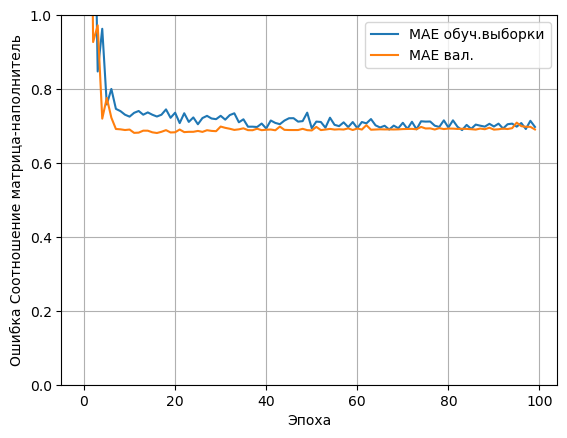

In [219]:
plot_loss(history_smn)

In [220]:
predict_smn = model_Seq_smn.predict(X_test_smn)

4/4 [==============================] - 0s 2ms/step


In [221]:
r2_score(y_test_smn, predict_smn)

-0.04496673354481029